**In this project I used clustering methods to cluster customer profiles.**

# Data Setup

In [14]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('CardioGoodFitness.csv')

In [3]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


# EDA

In [4]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [8]:
df.Product.unique()

array(['TM195', 'TM498', 'TM798'], dtype=object)

In [12]:
df.isna().any()

Product          False
Age              False
Gender           False
Education        False
MaritalStatus    False
Usage            False
Fitness          False
Income           False
Miles            False
dtype: bool

<AxesSubplot:xlabel='Gender', ylabel='Age'>

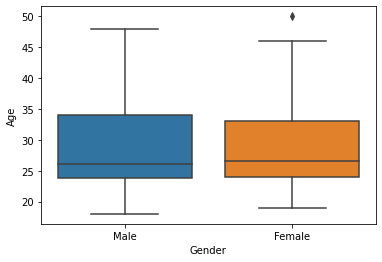

In [15]:
sns.boxplot(x="Gender", y="Age", data=df)

In [16]:
pd.crosstab(df['Product'],df['Gender'] )

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


<AxesSubplot:>

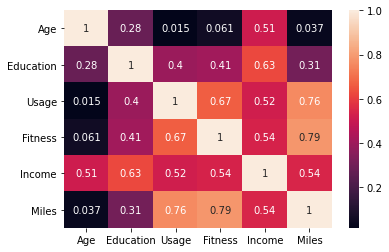

In [17]:
corr = df.corr()
sns.heatmap(corr, annot=True)

## PDR

In [7]:
import pandas_profiling
df.profile_report()

KeyboardInterrupt: 

# Modelling

In [9]:
from sklearn.model_selection import train_test_split

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [40]:
X = df

In [41]:
X = pd.get_dummies(X,drop_first=True)

In [55]:
model = KMeans(n_clusters=3)

In [56]:
model = model.fit(X)

In [57]:
pred = model.predict(X)

In [58]:
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [59]:
silhouette_score(X,pred)

0.5737691450798718

No handles with labels found to put in legend.


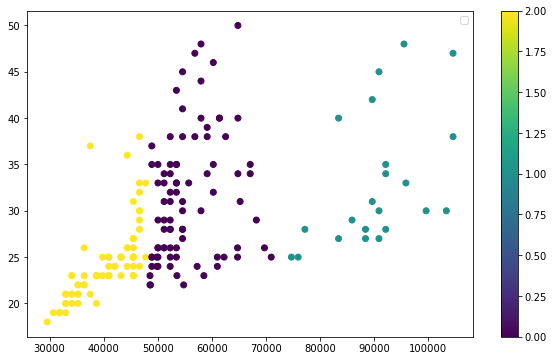

In [60]:
plt.figure(figsize=(10,6))
plt.scatter(X.Income, X.Age, c= pred)
plt.legend()
plt.colorbar()
plt.show();

In [61]:
import numpy as np

In [62]:
allscore=[]
allclusters=[]
sum_of_squared_distances = []
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        #model-model fit(x) 
        pred=model.fit_predict(X)
        sum_of_squared_distances.append(model.inertia_)
        score=silhouette_score(X,pred)
        print ("Number of cluster {}, silhouette {}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(9)

Number of cluster 2, silhouette 0.7205227474132727
Number of cluster 3, silhouette 0.5737691450798718
Number of cluster 4, silhouette 0.5889020046697513
Number of cluster 5, silhouette 0.5810313164004832
Number of cluster 6, silhouette 0.5973594297205888
Number of cluster 7, silhouette 0.5957269855744487
Number of cluster 8, silhouette 0.5771056041187488
Number of cluster 9, silhouette 0.5922950016044297


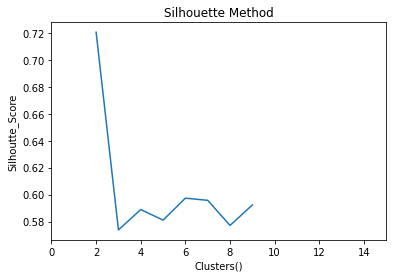

In [63]:
plt.plot(allclusters, allscore)
plt.xlabel('Clusters()')
plt.ylabel('Silhoutte_Score')
plt.title('Silhouette Method')
plt.xlim(0,15)
plt.show()

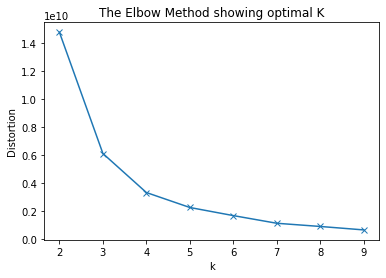

In [64]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
plt.show()